## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |


In [144]:
import pandas as pd
kommun = pd.Series({0:"Malmö", 1:"Stockholm", 2:"Uppsala", 3:"Göteborg"})
population = pd.Series({0:347949, 1:975551, 2:233839, 3:583056 })
cities_in_sweden = pd.DataFrame({"Kommun": kommun, "Population":population})

cities_in_sweden

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [145]:
import pandas as pd

data = {"Kommun": ["Malmö", "Stockholm", "Uppsala","Göteborg"], "Population": [347949,975551,233839,583056]}
print(data)
cities = pd.DataFrame(data)
cities


{'Kommun': ['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'], 'Population': [347949, 975551, 233839, 583056]}


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


&nbsp; a) Use your DataFrame to print out all the cities.

In [146]:
data = {"Kommun": ["Malmö", "Stockholm", "Uppsala","Göteborg"]}
all_cities = pd.DataFrame(data)
all_cities

,Kommun
0,Malmö
1,Stockholm
2,Uppsala
3,Göteborg


&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg.

In [147]:
cities_in_sweden.loc[[3]]

,Kommun,Population
3,Göteborg,583056


In [148]:
cities.loc[cities["Kommun"] == "Göteborg"] # using indexer 

,Kommun,Population
3,Göteborg,583056


In [149]:
select = cities[cities["Kommun"]== "Göteborg"] # Using masking to filter the DataFrame
select

,Kommun,Population
3,Göteborg,583056


&nbsp; c) Sort the cities by population from largest to smallest. 

In [150]:
sorted_cities = cities.sort_values(by = "Population", ascending= False, ignore_index=True)
sorted_cities

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


&nbsp; d) Filter out the three largest cities.

In [151]:
three_largest_cities = cities[cities["Population"] >= 300000].sort_values(
    by="Population", ascending=False, ignore_index=True
)
three_largest_cities


,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 

In [152]:
total_sweden_population = 10379295
percentage_population =  100 * (sorted_cities["Population"]/ total_sweden_population)
sorted_cities["Population(%)"] = round(percentage_population, 1)
sorted_cities

,Kommun,Population,Population(%)
0,Stockholm,975551,9.4
1,Göteborg,583056,5.6
2,Malmö,347949,3.4
3,Uppsala,233839,2.3


## 2. Cities in Sweden - real dataset 

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 


&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. 

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt",skiprows = 6)
df.head()

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    int64  
 1   2019        290 non-null    int64  
 2   Unnamed: 2  290 non-null    object 
 3   2020.1      290 non-null    int64  
 4   2019.1      290 non-null    int64  
 5   %           290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB


In [155]:
df.describe()

,2020,2019,2020.1,2019.1,%
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862,0.154672
std,83.860002,83.856743,74627.031657,74292.525065,0.953047
min,1.000000,1.000000,2387.000000,2408.000000,-3.208917
25%,73.250000,73.250000,10014.500000,10075.000000,-0.392807
50%,145.500000,145.500000,16079.500000,15978.000000,0.147039
75%,217.750000,217.750000,36215.250000,36096.750000,0.737224
max,290.000000,290.000000,975551.000000,974073.000000,4.088165


In [156]:
df.shape

(290, 6)

In [157]:
df["Unnamed: 2"].unique()

array(['Ale', 'Alingsås', 'Alvesta', 'Aneby', 'Arboga', 'Arjeplog',
       'Arvidsjaur', 'Arvika', 'Askersund', 'Avesta', 'Bengtsfors',
       'Berg', 'Bjurholm', 'Bjuv', 'Boden', 'Bollebygd', 'Bollnäs',
       'Borgholm', 'Borlänge', 'Borås', 'Botkyrka', 'Boxholm', 'Bromölla',
       'Bräcke', 'Burlöv', 'Båstad', 'Dals-Ed', 'Danderyd', 'Degerfors',
       'Dorotea', 'Eda', 'Ekerö', 'Eksjö', 'Emmaboda', 'Enköping',
       'Eskilstuna', 'Eslöv', 'Essunga', 'Fagersta', 'Falkenberg',
       'Falköping', 'Falun', 'Filipstad', 'Finspång', 'Flen', 'Forshaga',
       'Färgelanda', 'Gagnef', 'Gislaved', 'Gnesta', 'Gnosjö', 'Gotland',
       'Grums', 'Grästorp', 'Gullspång', 'Gällivare', 'Gävle', 'Göteborg',
       'Götene', 'Habo', 'Hagfors', 'Hallsberg', 'Hallstahammar',
       'Halmstad', 'Hammarö', 'Haninge', 'Haparanda', 'Heby', 'Hedemora',
       'Helsingborg', 'Herrljunga', 'Hjo', 'Hofors', 'Huddinge',
       'Hudiksvall', 'Hultsfred', 'Hylte', 'Håbo', 'Hällefors',
       'Härjedalen', '

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |


In [158]:
df.rename(
    columns={
        2020: "Range 2020",
        2019: "Range 2019",
        "Unnamed: 2": "Kommun",
        "2020.1": "Folkmängd 2020",
        "2019.1": "Folkmängd 2019",
        "%": "Förändring",
    },
    inplace=True,
)
df.head()


,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


&nbsp; c) Sort the cities by population from largest to smallest. (*)

In [159]:
sort_largest_cities = df.sort_values(by="Folkmängd 2020", ascending= False, ignore_index=True).head()
sort_largest_cities

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


&nbsp; d) Filter out the five smallest cities.


In [160]:
smallest_cities = df.sort_values(by="Folkmängd 2020", ascending= True, ignore_index=True).head()
smallest_cities


,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,290,290,Bjurholm,2387,2408,-0.872093
1,289,289,Sorsele,2442,2489,-1.888309
2,288,288,Dorotea,2498,2551,-2.077617
3,287,287,Arjeplog,2718,2785,-2.405745
4,286,286,Åsele,2805,2794,0.393701


In [161]:
sort_smallest_cities = smallest_cities[::-1]
sort_smallest_cities

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
4,286,286,Åsele,2805,2794,0.393701
3,287,287,Arjeplog,2718,2785,-2.405745
2,288,288,Dorotea,2498,2551,-2.077617
1,289,289,Sorsele,2442,2489,-1.888309
0,290,290,Bjurholm,2387,2408,-0.872093


&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. 


In [162]:
df.head()

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [163]:
sweden_population_2020 = df["Folkmängd 2020"].sum()
sweden_population_2019 = df["Folkmängd 2019"].sum()
print(f"Populationen i Sverige 2020 :{sweden_population_2020}")
print(f"Populationen i Sverige 2019 :{sweden_population_2019}")


Populationen i Sverige 2020 :10379295
Populationen i Sverige 2019 :10327589


&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities.  

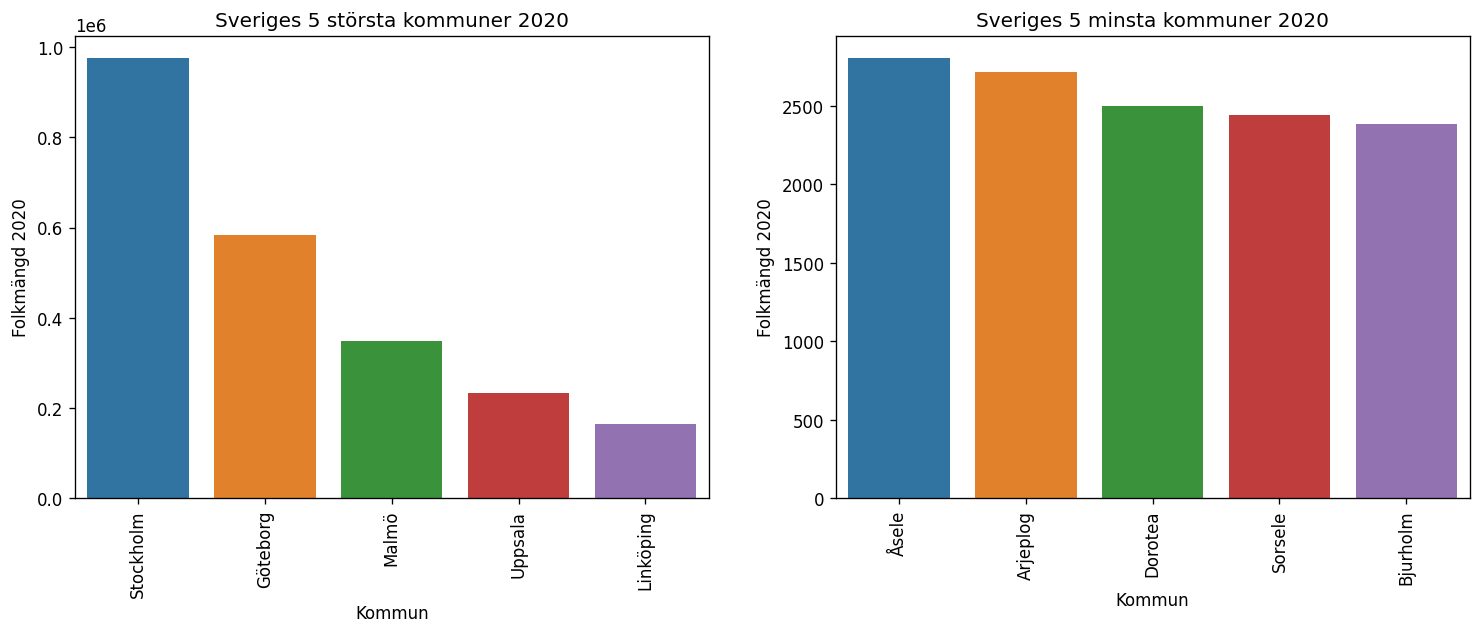

In [164]:
fig, axes = plt.subplots(1,2, figsize = (15,5), dpi = 120)
titles = ["Sveriges 5 största kommuner 2020", "Sveriges 5 minsta kommuner 2020"]
data_frame = (sort_largest_cities, sort_smallest_cities)
x_columns = ["Kommun", "Kommun"]

for i, (data, title) in enumerate(zip(data_frame, titles)):
    sns.barplot(data=data, x = x_columns[i], y = "Folkmängd 2020", ax= axes[i])
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)
#plt.show()

## 3. Cities in Sweden - gender 

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

In [165]:
df_kvinnor = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Kvinnor",skiprows = 6)
df_kvinnor.head()

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,84,85,Ale,15612,15348,1.720094
1,64,64,Alingsås,20900,20774,0.606527
2,123,123,Alvesta,9857,9795,0.632976
3,255,255,Aneby,3318,3350,-0.955224
4,165,164,Arboga,6945,6973,-0.401549


In [166]:
df_män = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Män",skiprows = 6)
df_män.head()

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,81,83,Ale,16256,16054,1.258253
1,64,64,Alingsås,20702,20646,0.271239
2,122,123,Alvesta,10367,10339,0.270819
3,255,255,Aneby,3503,3498,0.142939
4,169,168,Arboga,7094,7114,-0.281136


&nbsp; a) Clean your data so that the head looks like this: 

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |

In [167]:
df_män.rename(
    columns={
        2020: "Range 2020",
        2019: "Range 2019",
        "Unnamed: 2": "Kommun",
        "2020.1": "Folkmängd 2020",
        "2019.1": "Folkmängd 2019",
        "%": "Förändring",
    },
    inplace=True,
)
df_män = df_män.assign(Kön = "Män")
df_män.head()

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Män
1,64,64,Alingsås,20702,20646,0.271239,Män
2,122,123,Alvesta,10367,10339,0.270819,Män
3,255,255,Aneby,3503,3498,0.142939,Män
4,169,168,Arboga,7094,7114,-0.281136,Män


In [168]:
df_kvinnor.rename(
    columns={
        2020: "Range 2020",
        2019: "Range 2019",
        "Unnamed: 2": "Kommun",
        "2020.1": "Folkmängd 2020",
        "2019.1": "Folkmängd 2019",
        "%": "Förändring",
    },
    inplace=True,
)
df_kvinnor = df_kvinnor.assign(Kön = "Kvinnor")
df_kvinnor.head()

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinnor
1,64,64,Alingsås,20900,20774,0.606527,Kvinnor
2,123,123,Alvesta,9857,9795,0.632976,Kvinnor
3,255,255,Aneby,3318,3350,-0.955224,Kvinnor
4,165,164,Arboga,6945,6973,-0.401549,Kvinnor


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |


In [169]:
df_concatenated = pd.concat([df_män, df_kvinnor], ignore_index=True)
df_total = df_concatenated.drop(["Range 2020", "Range 2019"], axis = "columns")
df_total.head()



,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,16256,16054,1.258253,Män
1,Alingsås,20702,20646,0.271239,Män
2,Alvesta,10367,10339,0.270819,Män
3,Aneby,3503,3498,0.142939,Män
4,Arboga,7094,7114,-0.281136,Män


&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |


In [170]:
df.head(1)

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982


In [171]:
df_new = (
    df.rename(
        columns={
            "Folkmängd 2020": "Total Pop 2020",
            "Folkmängd 2019": "Total Pop 2019",
            "Förändring": " Total förändring",
        }
    )
    .drop(["Range 2020", "Range 2019"], axis="columns")
    
)
df_new.head()


,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.340740


&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |


In [172]:
df_merge = df_total.merge(df_new).sort_values(by= "Total Pop 2020", ascending= False, ignore_index=True)
df_merge.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
0,Stockholm,482982,482220,0.158019,Män,975551,974073,0.151734
1,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073,0.151734
2,Göteborg,290551,288973,0.546072,Kvinnor,583056,579281,0.651670
3,Göteborg,292505,290308,0.756782,Män,583056,579281,0.651670
4,Malmö,175411,173543,1.07639,Kvinnor,347949,344166,1.099179


 &nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. 

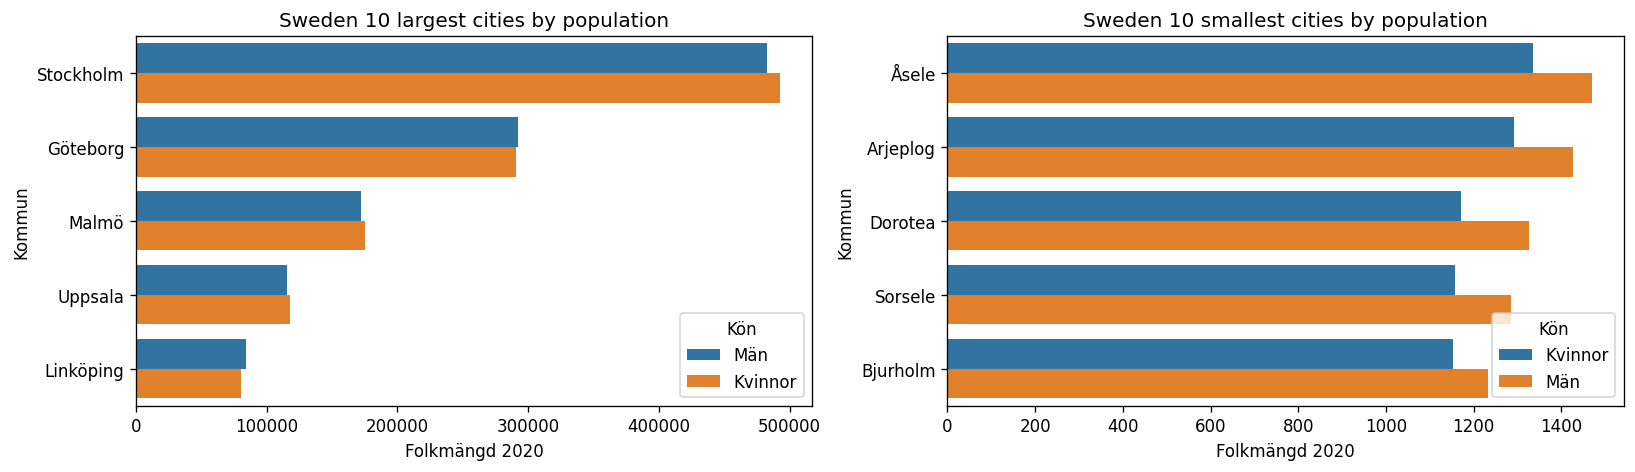

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4), dpi=120)
data_frames = [df_merge.head(10), df_merge.tail(10)]
titles = ["Sweden 10 largest cities by population", "Sweden 10 smallest cities by population"]

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x = "Folkmängd 2020", y = "Kommun", hue = "Kön", ax = axes[i])
    axes[i].set(title = title)
    



&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. 


In [174]:
#df_merge.groupby("Kön")
x = df_merge.groupby("Kön").sum("Folkmängd 2020")
x

,Folkmängd 2020,Folkmängd 2019,Total Pop 2020,Total Pop 2019,Total förändring
Kön,,,,,
Kvinnor,5156448,5131775,10379295,10327589,44.854988
Män,5222847,5195814,10379295,10327589,44.854988


In [175]:
x["Folkmängd 2020"]

Kön
Kvinnor    5156448
Män        5222847
Name: Folkmängd 2020, dtype: int64

In [176]:
x.index

Index(['Kvinnor', 'Män'], dtype='object', name='Kön')

Text(0.5, 1.0, 'The total male and female population in Sweden 2020')

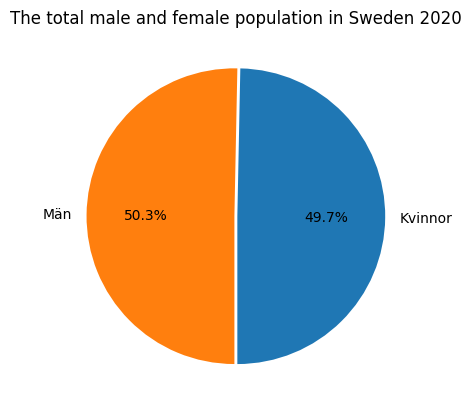

In [177]:
plt.pie(x = x["Folkmängd 2020"], labels= x.index, autopct="%0.1f%%", explode=[0.01, 0.01], startangle= -90)
plt.title("The total male and female population in Sweden 2020")

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020.

In [178]:
df_merge

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
0,Stockholm,482982,482220,0.158019,Män,975551,974073,0.151734
1,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073,0.151734
2,Göteborg,290551,288973,0.546072,Kvinnor,583056,579281,0.651670
3,Göteborg,292505,290308,0.756782,Män,583056,579281,0.651670
4,Malmö,175411,173543,1.07639,Kvinnor,347949,344166,1.099179
...,...,...,...,...,...,...,...,...
575,Dorotea,1171,1195,-2.008368,Kvinnor,2498,2551,-2.077617
576,Sorsele,1285,1319,-2.57771,Män,2442,2489,-1.888309
577,Sorsele,1157,1170,-1.111111,Kvinnor,2442,2489,-1.888309
578,Bjurholm,1154,1159,-0.431406,Kvinnor,2387,2408,-0.872093


In [179]:
df_merge["Folkmängd 2020"] = df_merge["Folkmängd 2020"].astype(int)
df_merge["Folkmängd 2020"].head()

0    482982
1    492569
2    290551
3    292505
4    175411
Name: Folkmängd 2020, dtype: int32

In [180]:
x = (df_merge["Folkmängd 2020"]/df_merge["Folkmängd 2020"].sum())*100
x

0      4.653322
1      4.745688
2      2.799333
3      2.818159
4      1.690009
         ...   
575    0.011282
576    0.012380
577    0.011147
578    0.011118
579    0.011879
Name: Folkmängd 2020, Length: 580, dtype: float64

In [181]:
df_merge.groupby("Kön")["Folkmängd 2020"].size()

Kön
Kvinnor    290
Män        290
Name: Folkmängd 2020, dtype: int64

In [182]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kommun             580 non-null    object 
 1   Folkmängd 2020     580 non-null    int32  
 2   Folkmängd 2019     580 non-null    int64  
 3   Förändring         580 non-null    object 
 4   Kön                580 non-null    object 
 5   Total Pop 2020     580 non-null    int64  
 6   Total Pop 2019     580 non-null    int64  
 7    Total förändring  580 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 34.1+ KB


In [183]:
df_merge[df_merge["Förändring"] == "."] = 0.0

In [184]:
df_merge["Förändring"] = df_merge["Förändring"].astype(float)
df_merge["Förändring"].head()


0    0.158019
1    0.145572
2    0.546072
3    0.756782
4    1.076390
Name: Förändring, dtype: float64

In [185]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kommun             580 non-null    object 
 1   Folkmängd 2020     580 non-null    int32  
 2   Folkmängd 2019     580 non-null    int64  
 3   Förändring         580 non-null    float64
 4   Kön                580 non-null    object 
 5   Total Pop 2020     580 non-null    int64  
 6   Total Pop 2019     580 non-null    int64  
 7    Total förändring  580 non-null    float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 34.1+ KB


In [186]:
df_merge["Folkmängd 2020"] = df_merge["Folkmängd 2020"].astype(int)
df_merge["Folkmängd 2020"].head()

0    482982
1    492569
2    290551
3    292505
4    175411
Name: Folkmängd 2020, dtype: int32

In [187]:
(df_merge["Förändring"]/df_merge["Folkmängd 2020"])*100

0      0.000033
1      0.000030
2      0.000188
3      0.000259
4      0.000614
         ...   
575   -0.171509
576   -0.200600
577   -0.096034
578   -0.037384
579   -0.103895
Length: 580, dtype: float64

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020

In [194]:
df_population_2019_2020 = (
    df.rename(columns={"Förändring": "Population Förändring i %"})
    .sort_values(by="Population Förändring i %", ascending=False)
   
).head()
df_population_2019_2020


,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Population Förändring i %
232,164,169,Trosa,14309,13747,4.088165
240,87,89,Upplands-Bro,30195,29346,2.893069
116,242,242,Lekeberg,8472,8234,2.890454
269,187,191,Åre,12049,11727,2.745800
285,54,55,Österåker,46644,45574,2.347830


Text(0.5, 1.0, 'De Kommuner med störst procentuell populationökning')

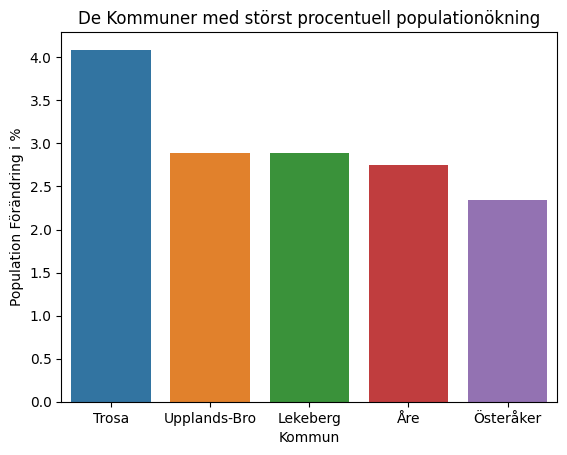

In [196]:
sns.barplot(data = df_population_2019_2020, x = "Kommun", y = "Population Förändring i %")
plt.title("De Kommuner med störst procentuell populationökning")